# A. Problem Statement

You are working in an e-commerce company, and your company has put forward a task to
analyze the customer reviews for various products. You are supposed to create a report that
classifies the products based on the customer reviews.

# B. Project Objective

The objective of this project is to  find various trends and patterns and creating useful insights for best quality product. We have to determine whether the review is positive or negative. A rating of 4 or 5 could be considered a Positive Review and a review of 1 or 2 could be considered Negative Review and a review of 3 is Neutral. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.

# C. Data Discription

This dataset contains more than 568k consumer reviews on different products. This data can be used to improve customer experience, optimize product offerings, and identify areas of improvement. The data includes customer reviews, ratings, and other related information. It can also include customer demographics, purchase history, and other related data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import re, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
review = pd.read_csv('Reviews.csv')
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# D. Data Pre-processing Steps and Inspiration

Data pre-processing is an important step in the machine learning process. It includes the following steps:
1. Data Cleaning: Removing missing or invalid data points, as well as outliers that may skew the results.
2. Data Visualization: Visualizing data for better understanding.
3. Data Organization: Organizing the data to make it suitable for machine learning algorithms.
4. Feature Selection: Selecting the most relevant features that will be used in the analysis.
3. Data Transformation: Transforming categorical variables into numerical ones so that it can be easy to make predictions.

In [3]:
review.shape

(568454, 10)

In [4]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
review.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
#Checking Nulls

review.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
review.dropna(inplace = True)

In [8]:
review.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [9]:
# Checking Duplicates

review.duplicated().sum()

0

In [10]:
# Checking and visualizing scores and converting them into Positive, Negative and Neutral sentiments

review['Score'].value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

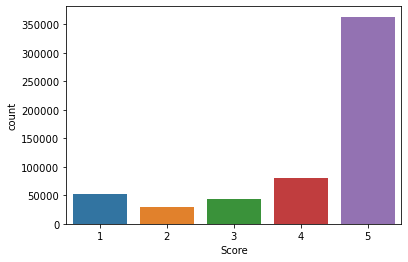

In [11]:
sns.countplot(review['Score'])
plt.show()

In [12]:
def score(column):
    if column['Score']==1 or column['Score']==2:
        return 'Negative'
    elif column['Score']==4 or column['Score']==5:
        return 'Positive'
    else:
        return 'Neutral'

In [13]:
review['Sentiment'] = review.apply(score, axis = 1)
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [14]:
review['Sentiment'].value_counts()

Positive    443766
Negative     82007
Neutral      42638
Name: Sentiment, dtype: int64

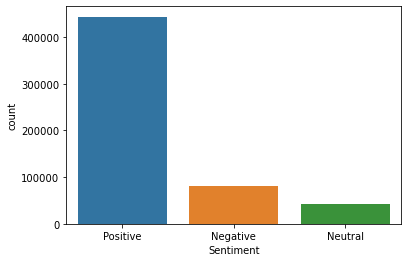

In [15]:
sns.countplot(review['Sentiment']);

In [16]:
from wordcloud import WordCloud, STOPWORDS

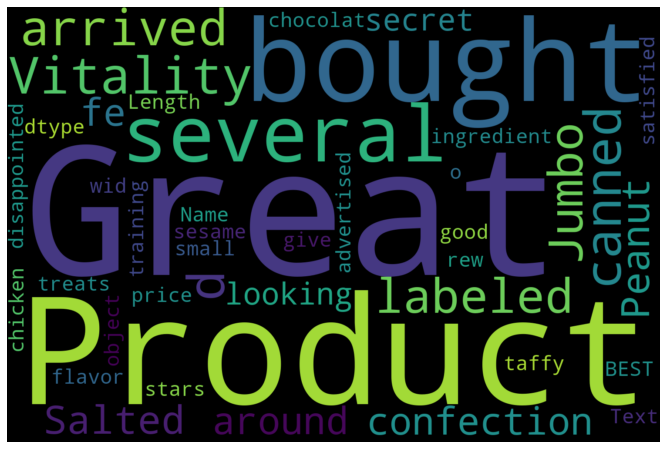

In [17]:
txt = review['Text']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [18]:
review_positive = review[review['Sentiment']=='Positive']

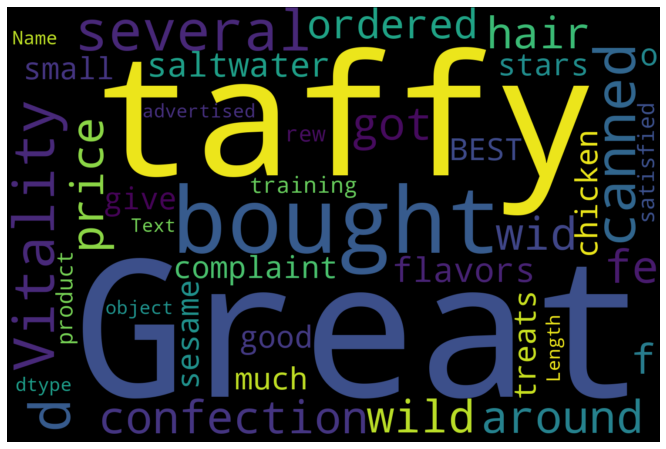

In [19]:
txt = review_positive['Text']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [20]:
review_negative = review[review['Sentiment']=='Negative']

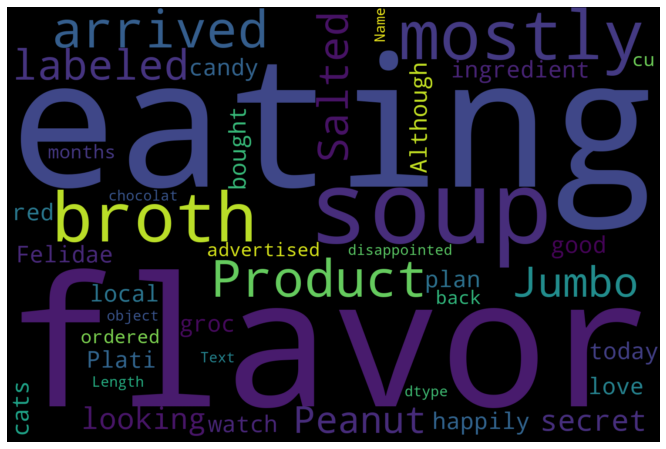

In [21]:
txt = review_negative['Text']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [22]:
review_neutral = review[review['Sentiment']=='Neutral']

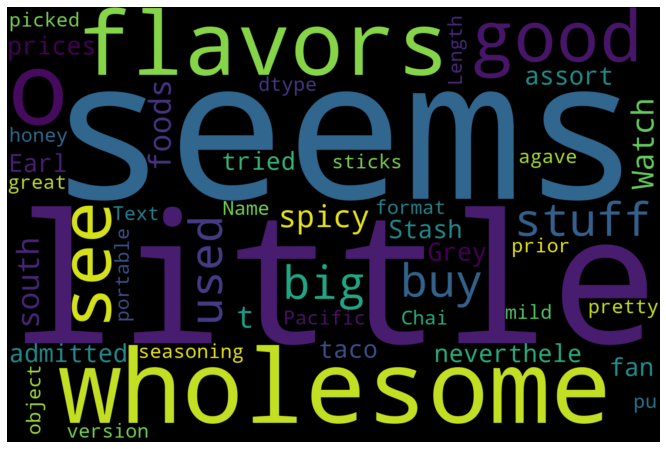

In [23]:
txt = review_neutral['Text']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [24]:
review.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative


In [25]:
# Dropping unwanted columns except 'Summary', 'Text' and 'Sentiments'

data = review.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score',
                     'Time'], axis = 1)

In [26]:
data.head()

,Summary,Text,Sentiment
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [27]:
data['Text'] = data['Text'].apply(lambda x : x.split())
data['Summary'] = data['Summary'].astype(str).str.split()

In [28]:
# Adding 'Summary' and 'Text' column to a single 'Reviews'

data['Reviews'] = data['Summary'] + data['Text']
data['Reviews'].head()

0    [Good, Quality, Dog, Food, I, have, bought, se...
1    [Not, as, Advertised, Product, arrived, labele...
2    ["Delight", says, it, all, This, is, a, confec...
3    [Cough, Medicine, If, you, are, looking, for, ...
4    [Great, taffy, Great, taffy, at, a, great, pri...
Name: Reviews, dtype: object

In [29]:
data['Reviews'] = data['Reviews'].apply(lambda x : ' '.join(x))

In [30]:
final_data = data[['Reviews', 'Sentiment']]
final_data.head()

,Reviews,Sentiment
0,Good Quality Dog Food I have bought several of...,Positive
1,Not as Advertised Product arrived labeled as J...,Negative
2,"""Delight"" says it all This is a confection tha...",Positive
3,Cough Medicine If you are looking for the secr...,Negative
4,Great taffy Great taffy at a great price. Ther...,Positive


In [31]:
final_data = final_data[:20000]

In [32]:
final_data.shape

(20000, 2)

In [33]:
final_data['Reviews'][50]

"Don't like it This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [34]:
# Cleaning the text

def clean_text(text):
    # Converting to lowercase
    text = text.lower()
    
    # Removing URLs
    text = re.sub(r'https?://\S+', '', text)
    
    # Removing punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if not token in stop_words]
    
    # Joining the tokens to form the cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [35]:
# Cleaning the 'Reviews' column of the dataset

final_data['Reviews'] = final_data['Reviews'].apply(clean_text)
final_data['Reviews'].head()

0    good quality dog food bought several vitality ...
1    advertised product arrived labeled jumbo salte...
2    delight says confection around centuries light...
3    cough medicine looking secret ingredient robit...
4    great taffy great taffy great price wide assor...
Name: Reviews, dtype: object

In [36]:
final_data['Reviews'][50]

'dont like oatmeal good mushy soft dont like quaker oats way go'

# E. Choosing the Algorithm for the Project

The algorithm that should be used for this project depends on the type of data that is being analyzed. If the data is numerical, then a regression algorithm such as linear regression or logistic regression could be used. If the data is categorical, then a classification algorithm such as decision trees or support vector machines could be used. If the data is a combination of numerical and categorical, then an ensemble algorithm such as random forests or gradient boosting could be used.

# F. Motivation and Reasons For Choosing the Algorithm

We will choose Logistic Regression algorithm. It is a popular choice for customer reviews in an e-commerce company.

The motivation for choosing the Logistic Regression algorithm is because it is a simple and effective algorithm that can quickly classify customer reviews into different categories. It is also relatively easy to implement and can be used to quickly identify customer sentiment. We will also try Random Forest and SGD Classifier to find the good accuracy or utlimately, the best algorithm.

In [37]:
x = final_data['Reviews']
y = final_data['Sentiment']

In [38]:
# Creating Document Term Matrix using TFIDFVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(x)
x

<20000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 643889 stored elements in Compressed Sparse Row format>

In [39]:
# Handling imbalance using SMOTE

print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

print(f'Resampled dataset shape : {Counter(y)}')

Original dataset shape : Counter({'Positive': 15407, 'Negative': 2944, 'Neutral': 1649})
Resampled dataset shape : Counter({'Positive': 15407, 'Negative': 15407, 'Neutral': 15407})


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

### Logistic Regression

In [41]:
logRegr = LogisticRegression()
logRegr.fit(x_train, y_train)

LogisticRegression()

In [42]:
y_pred = logRegr.predict(x_test)

In [43]:
accuracy_score(y_test, y_pred)

0.9020010816657653

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.92      0.92      0.92      3095
     Neutral       0.86      0.93      0.90      3105
    Positive       0.93      0.85      0.89      3045

    accuracy                           0.90      9245
   macro avg       0.90      0.90      0.90      9245
weighted avg       0.90      0.90      0.90      9245



### Random Forest

In [45]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
rfc_y_pred = rfc.predict(x_test)

In [47]:
accuracy_score(y_test, rfc_y_pred)

0.9535965386695511

In [48]:
print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

    Negative       0.96      0.96      0.96      3095
     Neutral       0.97      0.97      0.97      3105
    Positive       0.94      0.93      0.93      3045

    accuracy                           0.95      9245
   macro avg       0.95      0.95      0.95      9245
weighted avg       0.95      0.95      0.95      9245



### SGD Classifier

In [49]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier()

In [50]:
sgd_y_pred = sgd.predict(x_test)

In [51]:
accuracy_score(y_test, sgd_y_pred)

0.8804759329367225

In [52]:
print(classification_report(y_test, sgd_y_pred))

              precision    recall  f1-score   support

    Negative       0.90      0.90      0.90      3095
     Neutral       0.84      0.90      0.87      3105
    Positive       0.91      0.84      0.87      3045

    accuracy                           0.88      9245
   macro avg       0.88      0.88      0.88      9245
weighted avg       0.88      0.88      0.88      9245



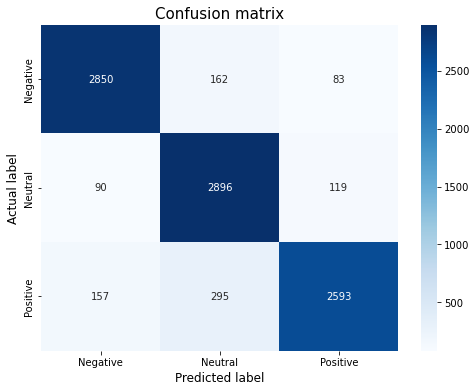

In [53]:
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('Actual label', fontsize=12)
plt.show()

# G. Assumptions

The following assumptions were made in order to create the model for this project:

1. Machine learning can be used to analyze customer reviews to identify patterns and trends in customer feedback.
2. Machine learning can be used to identify customer sentiment and classify customer reviews into positive, negative, and neutral categories.
3. Machine learning can be used to identify customer preferences and recommend products or services based on customer reviews.
4. Machine learning can be used to identify customer pain points and suggest improvements to the e-commerce company's products or services.

# H. Model Evaluation and Techniques

The following techniques and steps were involved in the evaluation of the model:

1. Split the data into training and testing sets: The first step in evaluating a machine learning model is to split the data into training and testing sets. This allows us to evaluate the model on unseen data and ensure that it is not overfitting.
2. Evaluate model performance: Once the data is split, we can evaluate the model performance using various metrics such as accuracy, precision, recall, and F1 score. We can also use cross-validation to further evaluate.

# I. Inferences from the Same

1. Customers are likely to be more satisfied with products that have higher ratings and more reviews.
2. Customers are more likely to purchase products that have higher ratings and more reviews.
3. Customers are more likely to trust products with higher ratings and more reviews.
4. Products with higher ratings and more reviews are more likely to be recommended by customers.
5. Products with higher ratings and more reviews are more likely to be shared on social media.

# J.Future Possibilities of the Project

In the future, the project could be expanded to include more advanced machine learning techniques such as natural language processing (NLP) and sentiment analysis. This would allow the system to better understand the customer reviews and provide more accurate insights. Additionally, the system could be used to identify customer trends and preferences, which could be used to improve the customer experience and increase sales. Finally, the system could be used to identify potential fraudulent reviews, which could help protect the integrity of the e-commerce platform